# Hyperparameter Tuning: Group Assignment #2
------------------------------------
**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-----------------------------

**Your Name Here: Rohit Akole**

**Net ID: rva23001**

We all know accepting the model defaults for sklearn models will give you a reasonable model - but let's push ourselves to get the best model possible!

# Rubric
* If you haven't already, sign up for a ChatGPT account (most students have likely already done this!)
  * Go to this website https://openai.com/blog/chatgpt and click 'Try Now' which will require to make an account
* Now that you are set up with ChatGPT, let's have some fun. Go to the list of sklearn regression models and **pick ONE regression model** that we haven't covered in class like SVM) that you would like to perform hyperparameter tuning.
  * Here are the list of sklearn models: https://scikit-learn.org/stable/supervised_learning.html
  * You can ask ChatGPT something like 'show me how to do hyperparameter tuning on a XYZ model in python (sklearn) and return the best model to predict the test dataset'. Take a screenshot of your output and upload it as an image in your notebook.
* (30 points) Now copy/paste the code into Colab use the raw output from ChatGPT on the CA housing training dataset and then apply to the CA housing test dataset. Make sure you make scatterplots of actual vs. predicted values and calculate error metrics for each partition (R2, MAE, RMSE).
* (30 points) Then play with the values for the grid search (and feel free to add others) and see if you were able to get a better architecture than ChatGPT. You will need to create error metrics and scatterplots for each partition again in order to compare your results.
* (20 points) Students will post to HuskyCT forum for peer review - thoughtful comments must be given (what was good, what could be improved, something new that could be added.)
  * After posting their script for review for peer feedback (as both as shareable link viewable to anyone with the link and as an uploaded file to HuskyCT), students will compare each others code quality and captions (business value of plot and table) and make a suggestions for improvement.
* (20 points) Lastly, make five detailed bullet points about what you learned on your own and what you learned from others during this assignment. Make note of whether or not your grid search was able to beat ChatGPT's grid search and use numbers to back-up your conclusions!

## Examples of common feedback items on HuskyCT
* "For your grid search, you may want to try (larger or smaller) values for X"
* "Your script could be cleaned up a bit, please add some headers and text narrative cells so it is easier to read"
* "I never heard of that algorithm before - I was reading the documentation and noticed this hyperparameter X, maybe you should add it and some candidate values like 1, 10, 100?"
* "If you have such bad results with this model, why don't you choose another one that acts a little more friendly? Not all models are suited to each dataset.'

# Importing Necessary Modules


In [ ]:
# Data Wrangling Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting the data / Even though we are not splitting the data in this example, I would like to keep my options open
from sklearn.model_selection import train_test_split

# Regression Error Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# KNN Regressor Modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Processing

In [ ]:
# your code here - read the data from the sample data in Colab
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test= pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
print(f'The shape of training dataframe: {df_train.shape}')
print(f'The shape of testing dataframe: {df_test.shape}')

The shape of training dataframe: (17000, 9)
The shape of testing dataframe: (3000, 9)


In [ ]:
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


# Defining traning and testing data for the model

In [ ]:
# For Training Dataframe
X_train = df_train.drop('median_house_value', axis=1)
y_train = df_train['median_house_value']

# For Testing Dataframe
X_test = df_test.drop('median_house_value', axis=1)
y_test = df_test['median_house_value']

# My ChatGPT Grid Search Screenshot for KNN Regressor

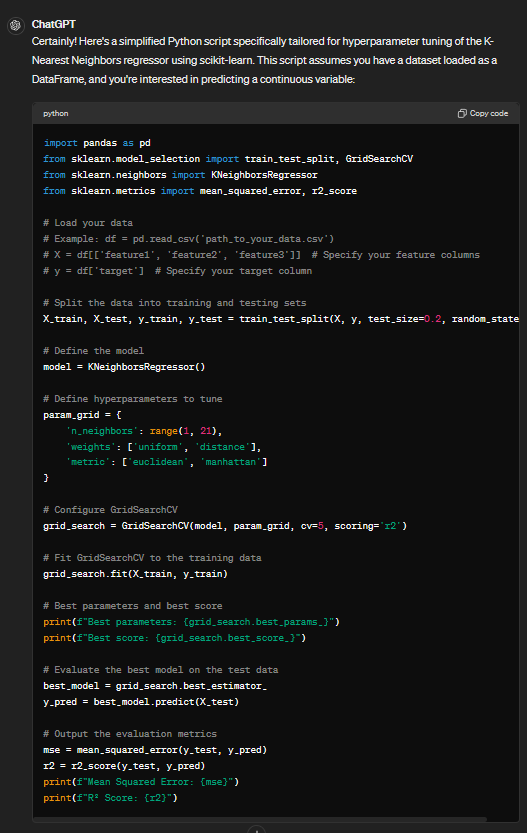

# ChatGPT Grid Search

In [ ]:
# Define the model
model = KNeighborsRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Configure GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_

# y prediction for test dataframe
y_pred_test = best_model.predict(X_test)

# y prediction for train dataframe
y_pred_train = best_model.predict(X_train)

# Output the evaluation metrics

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
gpt_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# MSE
train_mse = mean_squared_error(y_train, y_pred_train)
gpt_test_mse = mean_squared_error(y_test, y_pred_test)

# MAE
train_mae = mean_absolute_error(y_train, y_pred_train)
gpt_test_mae = mean_absolute_error(y_test, y_pred_test)

# R²
train_r2 = r2_score(y_train, y_pred_train)
gpt_test_r2 = r2_score(y_test, y_pred_test)

# Printing out the results for MSE and R²
print(f"Training Data - R²: {train_r2}, RMSE: {train_rmse}, MSE: {train_mse}, MAE: {train_mae}")
print(f"Testing Data - R²: {gpt_test_r2}, RMSE: {gpt_test_rmse}, MSE: {gpt_test_mse}, MAE: {gpt_test_mae}")

best_model

Best parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best score: 0.1858908023364105
Training Data - R²: 1.0, RMSE: 0.0, MSE: 0.0, MAE: 0.0
Testing Data - R²: 0.3476766696750908, RMSE: 91347.62445254541, MSE: 8344388493.123271, MAE: 70722.58481112719


KNeighborsRegressor(metric='manhattan', n_neighbors=19, weights='distance')

### Plotting Actual vs. Predicted Scatter Plots for Train and Test Datasets

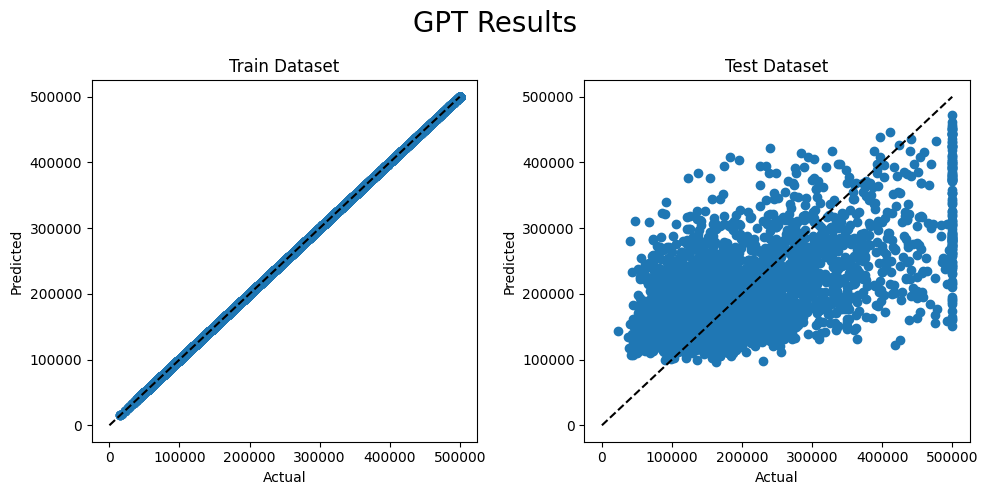

In [ ]:
# Plotting 2 scatter plots horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row 2 columns

# Giving title to the whole plot
fig.suptitle("GPT Results", fontsize=20)

axes[0].scatter(x=y_train, y=y_pred_train) # Left hand plot
axes[0].set_title("Train Dataset") # Title for the plot
axes[0].set_xlabel("Actual") # X-axis label
axes[0].set_ylabel("Predicted") # Y-axis label
axes[0].plot([0, 5E5], [0, 5E5], '--k') # 45 Degree line

axes[1].scatter(x=y_test, y=y_pred_test) # Right hand plot
axes[1].set_title("Test Dataset") # Title for the plot
axes[1].set_xlabel("Actual") # X-axis label
axes[1].set_ylabel("Predicted") # Y-axis label
axes[1].plot([0, 5E5], [0, 5E5], '--k') # 45 Degree line

fig.tight_layout()
plt.show()

# My Code

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reading the data
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test= pd.read_csv('/content/sample_data/california_housing_test.csv')

# For Training Dataframe
X_train = df_train.drop('median_house_value', axis=1)
y_train = df_train['median_house_value']

# For Testing Dataframe
X_test = df_test.drop('median_house_value', axis=1)
y_test = df_test['median_house_value']

# Scaling the features to avoid data leakage
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initiating the Model
knn = KNeighborsRegressor()

# Defining the Hyperparameters
param_grid = {
    'n_neighbors' : np.arange(1,30),
    'weights' : ['uniform', 'distance'],
    'metric' : ['chebyshev', 'cityblock', 'euclidean', 'manhattan', 'minkowski']
}

# Tuning the Hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Identifying best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

# Evaluating the best model using best estimator
best_model = grid_search.best_estimator_

# Predicting y test and y train using best model
my_y_pred_test = best_model.predict(X_test_scaled)
my_y_pred_train = best_model.predict(X_train_scaled)

# R²
train_r2 = r2_score(y_train, my_y_pred_train)
my_test_r2 = r2_score(y_test, my_y_pred_test)

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, my_y_pred_train))
my_test_rmse = np.sqrt(mean_squared_error(y_test, my_y_pred_test))

# MSE
train_mse = mean_squared_error(y_train, my_y_pred_train)
my_test_mse = mean_squared_error(y_test, my_y_pred_test)

# MAE
train_mae = mean_absolute_error(y_train, my_y_pred_train)
my_test_mae = mean_absolute_error(y_test, my_y_pred_test)

# Printing out the results for MSE and R²
print(f"Training Data - R²: {train_r2}, RMSE: {train_rmse}, MSE: {train_mse}, MAE: {train_mae}")
print(f"Testing Data - R²: {my_test_r2}, RMSE: {my_test_rmse}, MSE: {my_test_mse}, MAE: {my_test_mae}")

best_model

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
Best Score: 0.4572165588422233
Training Data - R²: 1.0, RMSE: 0.0, MSE: 0.0, MAE: 0.0
Testing Data - R²: 0.6926570205677269, RMSE: 62701.430714955946, MSE: 3931469413.7024207, MAE: 42460.89388508469


KNeighborsRegressor(metric='euclidean', n_neighbors=18, weights='distance')

# Comparing My Code Results vs GPT Code Results

My Testing Data Result - R²: 0.6926570205677269, RMSE: 62701.430714955946, MSE: 3931469413.7024207, MAE: 42460.89388508469
ChatGPT Testing Data Result- R²: 0.3476766696750908, RMSE: 91347.62445254541, MSE: 8344388493.123271, MAE: 70722.58481112719


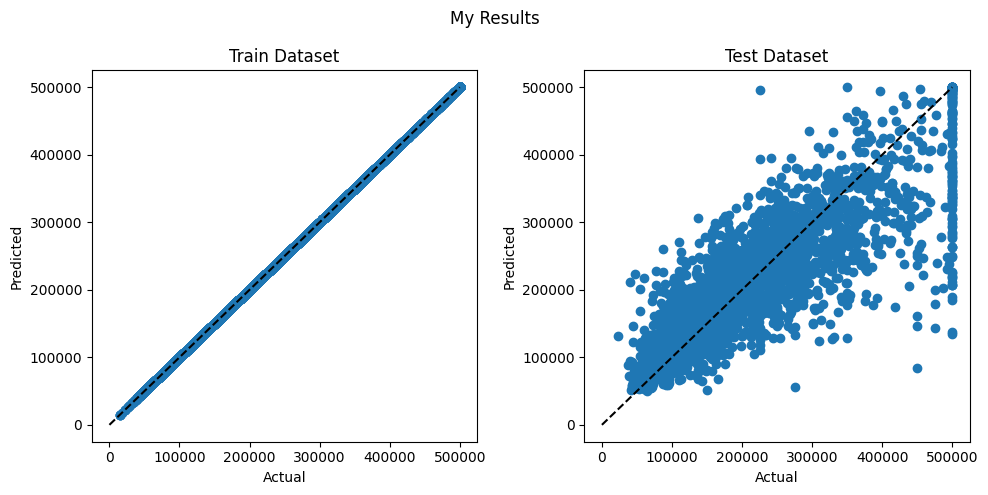

In [ ]:
print(f"My Testing Data Result - R²: {my_test_r2}, RMSE: {my_test_rmse}, MSE: {my_test_mse}, MAE: {my_test_mae}")
print(f"ChatGPT Testing Data Result- R²: {gpt_test_r2}, RMSE: {gpt_test_rmse}, MSE: {gpt_test_mse}, MAE: {gpt_test_mae}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('My Results')

ax[0].scatter(x=y_train, y=my_y_pred_train)
ax[0].set_title("Train Dataset") # Title for the plot
ax[0].set_xlabel("Actual") # X-axis label
ax[0].set_ylabel("Predicted") # Y-axis label
ax[0].plot([0, 5E5], [0, 5E5], '--k') # 45 Degree line

ax[1].scatter(x=y_test, y=my_y_pred_test) # Right hand plot
ax[1].set_title("Test Dataset") # Title for the plot
ax[1].set_xlabel("Actual") # X-axis label
ax[1].set_ylabel("Predicted") # Y-axis label
ax[1].plot([0, 5E5], [0, 5E5], '--k') # 45 Degree line

fig.tight_layout()
plt.show()

# Plotting GPT Plots vs. My Plots for comparison

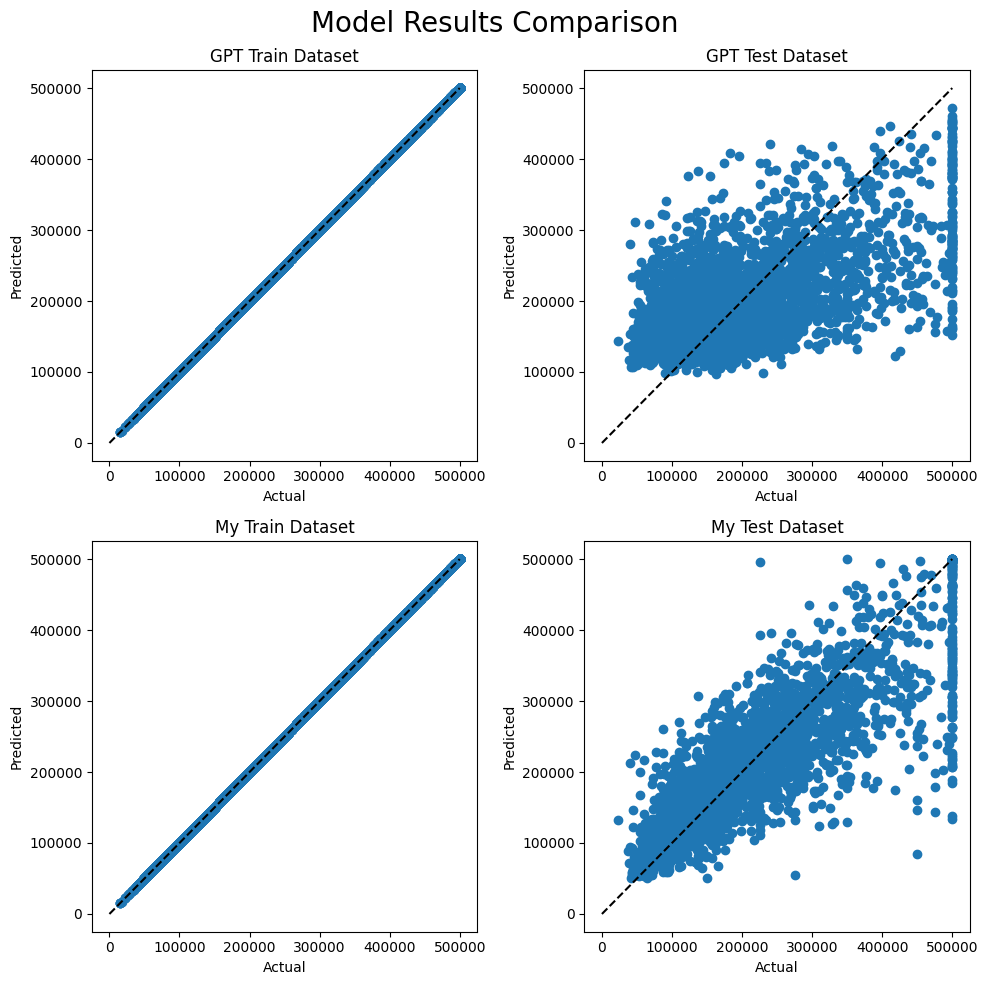

In [ ]:
# Plotting 4 scatter plots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns

# Giving title to the whole plot
fig.suptitle("Model Results Comparison", fontsize=20)

# First row for GPT Results
axes[0, 0].scatter(x=y_train, y=y_pred_train)
axes[0, 0].set_title("GPT Train Dataset")
axes[0, 0].set_xlabel("Actual")
axes[0, 0].set_ylabel("Predicted")
axes[0, 0].plot([0, 5E5], [0, 5E5], '--k')

axes[0, 1].scatter(x=y_test, y=y_pred_test)
axes[0, 1].set_title("GPT Test Dataset")
axes[0, 1].set_xlabel("Actual")
axes[0, 1].set_ylabel("Predicted")
axes[0, 1].plot([0, 5E5], [0, 5E5], '--k')

# Second row for My Results
axes[1, 0].scatter(x=y_train, y=my_y_pred_train)
axes[1, 0].set_title("My Train Dataset")
axes[1, 0].set_xlabel("Actual")
axes[1, 0].set_ylabel("Predicted")
axes[1, 0].plot([0, 5E5], [0, 5E5], '--k')

axes[1, 1].scatter(x=y_test, y=my_y_pred_test)
axes[1, 1].set_title("My Test Dataset")
axes[1, 1].set_xlabel("Actual")
axes[1, 1].set_ylabel("Predicted")
axes[1, 1].plot([0, 5E5], [0, 5E5], '--k')

fig.tight_layout()
plt.show()

# Bullet points (comparison of results)

*   As learned in class, we usually use scaling to deal with data leakage. The ChatGPT version of code did not took that under consideration and worked directly on the training and testing data without scaling.
*   In my code, I used MinMaxScaler to scale the X and used the scaled X instead of the original X_train and X_test while doing hyperparameter tuning, which in result, produced much better results as compared to the chatGPT version of the code.

    * The statistics of my model vs. ChatGPT Model shows clear differences
    * My Testing Data Result
        * R²: 0.6926570205677269
        * RMSE: 62701.430714955946
        * MSE: 3931469413.7024207
        * MAE: 42460.89388508469
    * ChatGPT Testing Data Result
        * R²: 0.3476766696750908
        * RMSE: 91347.62445254541
        * MSE: 8344388493.123271
        * MAE: 70722.58481112719

*   The scatter plot suggest the similar thing. The overall spread accross the 45 degree line in ChatGPT Test Dataset is wider as compared to my test dataset which is tighter and the data points are closed to the 45 degree line in my test plot. This explains that my code, written with what we learned in the class, is producing much better results as compared to the code drived by the ChatGPT.  